In [1]:
from scholarly import scholarly

In [2]:
# get author data from scholar
search_query = scholarly.search_author('Tijl Grootswagers')
author = scholarly.fill(next(search_query))

In [3]:
print(author['affiliation'])

MARCS Institute for Brain, Behaviour & Development, Western Sydney University


In [7]:
titles = [pub['bib']['title'] for pub in author['publications']]
text = ' '.join(titles)

In [23]:
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

(-0.5, 399.5, 199.5, -0.5)

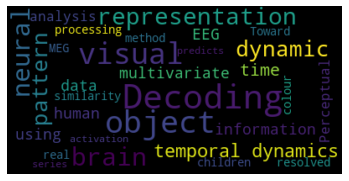

In [50]:
wordcloud = WordCloud(max_font_size=40,background_color="black", max_words=30)
wordcloud.generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")